In [16]:
import tensorflow as tf
from tensorflow.keras import layers, models
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix


In [17]:
# Focal Loss Function
def focal_loss(gamma=3.0, alpha=0.5):
    def focal_loss_fixed(y_true, y_pred):
        epsilon = tf.keras.backend.epsilon()
        y_pred = tf.clip_by_value(y_pred, epsilon, 1.0 - epsilon)
        focal_loss = -y_true * (alpha * tf.math.pow(1 - y_pred, gamma) * tf.math.log(y_pred))
        return tf.reduce_sum(focal_loss, axis=-1)
    return focal_loss_fixed

In [18]:
# Define the MLP model with ReLU activation
def create_mlp_model(input_shape, num_classes):
    model = models.Sequential()
    model.add(layers.Flatten(input_shape=input_shape))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(num_classes, activation='softmax'))
    return model

In [19]:
num_classes = 2

# Load dataset hasil oversampling ADASYN_Extreme
file_path_oversampled_extreme = 'D:\Tugas Akhir\Stroke\data_oversampled_extreme.csv'
df_oversampled_extreme = pd.read_csv(file_path_oversampled_extreme)

# Ganti koma dengan titik dan ubah tipe data ke float32 untuk kolom tertentu
columns_to_convert = ['age', 'avg_glucose_level', 'bmi']
df_oversampled_extreme[columns_to_convert] = df_oversampled_extreme[columns_to_convert].replace(',', '.', regex=True).astype('float32')

# Pisahkan fitur dan target untuk dataset hasil oversampling ADASYN_Extreme
X_oversampled_extreme = df_oversampled_extreme.drop('stroke', axis=1)
y_oversampled_extreme = df_oversampled_extreme['stroke']

# Mengonversi target menjadi one-hot encoding untuk ADASYN_Extreme
y_oversampled_one_hot_extreme = tf.keras.utils.to_categorical(y_oversampled_extreme, num_classes)

# Pastikan tipe data float32 untuk fitur
X_oversampled_extreme = X_oversampled_extreme.astype('float32')


# Load dataset hasil PCA-KMeans_Extreme
file_path_pca_kmeans_extreme = 'D:/Tugas Akhir/Stroke/data_hasil_nearmiss_extreme.csv'
df_pca_kmeans_extreme = pd.read_csv(file_path_pca_kmeans_extreme)

# Pisahkan fitur dan target untuk dataset hasil PCA-KMeans_Extreme
X_pca_kmeans_extreme = df_pca_kmeans_extreme.drop(['stroke', 'Cluster'], axis=1)
y_pca_kmeans_extreme = df_pca_kmeans_extreme['stroke']

# Mengonversi target menjadi one-hot encoding untuk PCA-KMeans_Extreme
y_pca_kmeans_one_hot_extreme = tf.keras.utils.to_categorical(y_pca_kmeans_extreme, num_classes)

# Pastikan tipe data float32 untuk fitur
X_pca_kmeans_extreme = X_pca_kmeans_extreme.astype('float32')

In [20]:
df_oversampled_extreme

,gender,age,hypertension,heart_disease,ever_married,work_type_Govt_job,work_type_Private,work_type_Self-employed,Residence_type,avg_glucose_level,bmi,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke
0,0,0.9649,0,1,1,0,1,0,1,0.2342,0.4380,0,0,1,0,1
1,0,0.8596,1,1,1,0,1,0,1,0.0687,0.3326,0,0,1,0,1
2,0,0.2982,0,0,1,0,1,0,1,0.1302,0.2913,1,0,0,0,1
3,1,1.0000,1,0,1,0,0,1,0,0.6544,0.2252,0,0,1,0,1
4,0,0.9298,0,0,1,0,1,0,1,0.1053,0.2603,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5741,1,0.9298,0,0,1,0,1,0,0,0.0685,0.2499,0,0,0,0,1
5742,0,0.9298,0,0,1,0,1,0,1,0.1063,0.2361,0,0,0,0,1
5743,1,0.9298,0,0,1,0,1,0,0,0.0832,0.2215,0,0,0,0,1
5744,0,0.4916,0,0,1,0,1,0,1,0.1237,0.2546,1,0,0,0,1


In [21]:
df_pca_kmeans_extreme

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,stroke,Cluster
0,0.1609,0.1999,2.3917,0.2535,0.0122,0.6571,-0.6305,0.5287,-0.5862,-0.6197,2.5260,-0.2013,-0.2629,0,4
1,-0.0488,0.2470,2.0321,0.0947,0.4436,0.7060,-0.2735,0.5475,-0.5498,-1.2199,-0.7226,-0.9224,0.7496,0,0
2,-0.0099,0.2653,1.8600,0.2272,0.2349,0.6066,-0.0701,-0.6743,0.9865,-1.2400,-0.6305,-0.5299,0.9584,0,2
3,0.1496,0.2060,2.3837,0.2830,0.0595,0.6811,-0.4812,0.5090,-0.6250,-0.7117,2.5498,0.1305,-0.1086,0,0
4,-0.1951,0.1971,1.8450,0.2818,0.1884,0.5932,-0.2110,-0.5062,1.1279,-1.0772,-0.7780,-1.3659,0.1602,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,2.1203,-1.6424,0.4181,-1.4210,-1.5783,-0.9552,-0.2926,-1.0903,0.4883,0.0628,-0.2087,-0.4636,0.7763,1,4
72,1.2501,2.7833,1.7999,2.7019,-1.7436,2.0729,0.0344,0.0129,0.6651,2.6112,-0.3810,1.2601,-1.5828,1,2
73,2.8890,-0.4835,1.3799,1.4661,1.0232,1.9468,-2.9979,1.5939,0.3225,0.6867,-2.3324,0.0237,-0.4619,1,2
74,-0.0460,1.4400,0.2555,-1.1558,0.6553,2.3986,1.1666,0.0341,-1.1368,0.7663,-1.1691,-1.0090,0.7007,1,0


In [22]:

# Hitung frekuensi nilai unik dalam kolom 'stroke'
stroke_counts = df_oversampled_extreme['stroke'].value_counts()
# Tampilkan output
print("Data Pada ADASYN Extreme 'stroke':")
print(stroke_counts)

# Hitung frekuensi nilai unik dalam kolom 'stroke'
stroke_counts = df_pca_kmeans_extreme['stroke'].value_counts()
# Tampilkan output
print("Data Pada PCA-KMeans Extreme 'stroke':")
print(stroke_counts)

Data Pada ADASYN Extreme 'stroke':
stroke
0    3481
1    2265
Name: count, dtype: int64
Data Pada PCA-KMeans Extreme 'stroke':
stroke
0    46
1    30
Name: count, dtype: int64


In [23]:
# Pisahkan data ADASYN menjadi set pelatihan dan pengujian
X_train_oversampled_extreme, X_test_oversampled_extreme, y_train_oversampled_extreme, y_test_oversampled_extreme = train_test_split(X_oversampled_extreme, y_oversampled_extreme, test_size=0.2, random_state=42)

# Pisahkan data PCA-KMeans menjadi set pelatihan dan pengujian
X_train_pca_kmeans_extreme, X_test_pca_kmeans_extreme, y_train_pca_kmeans_extreme, y_test_pca_kmeans_extreme = train_test_split(X_pca_kmeans_extreme, y_pca_kmeans_extreme, test_size=0.2, random_state=42)


In [24]:
import numpy as np
# Menghitung jumlah kelas 0 dan 1 pada ADASYN (data latih)
unique_oversampled_train, counts_oversampled_train = np.unique(y_train_oversampled_extreme, return_counts=True)
num_class_0_oversampled_train = counts_oversampled_train[unique_oversampled_train == 0][0]
num_class_1_oversampled_train = counts_oversampled_train[unique_oversampled_train == 1][0]

# Menghitung jumlah kelas 0 dan 1 pada ADASYN (data uji)
unique_oversampled_test, counts_oversampled_test = np.unique(y_test_oversampled_extreme, return_counts=True)
num_class_0_oversampled_test = counts_oversampled_test[unique_oversampled_test == 0][0]
num_class_1_oversampled_test = counts_oversampled_test[unique_oversampled_test == 1][0]

print("Data Latih ADASYN Extreme:")
print(f"Jumlah data latih: {len(y_train_oversampled_extreme)}")
print(f"Jumlah kelas 0: {num_class_0_oversampled_train}")
print(f"Jumlah kelas 1: {num_class_1_oversampled_train}")
print("\nData Uji ADASYN Extreme:")
print(f"Jumlah data uji: {len(y_test_oversampled_extreme)}")
print(f"Jumlah kelas 0: {num_class_0_oversampled_test}")
print(f"Jumlah kelas 1: {num_class_1_oversampled_test}")
print("===========================================")

# Menghitung jumlah kelas 0 dan 1 pada PCA-KMeans (data latih)
unique_pca_kmeans_train, counts_pca_kmeans_train = np.unique(y_train_pca_kmeans_extreme, return_counts=True)
num_class_0_pca_kmeans_train = counts_pca_kmeans_train[unique_pca_kmeans_train == 0][0]
num_class_1_pca_kmeans_train = counts_pca_kmeans_train[unique_pca_kmeans_train == 1][0]

# Menghitung jumlah kelas 0 dan 1 pada PCA-KMeans (data uji)
unique_pca_kmeans_test, counts_pca_kmeans_test = np.unique(y_test_pca_kmeans_extreme, return_counts=True)
num_class_0_pca_kmeans_test = counts_pca_kmeans_test[unique_pca_kmeans_test == 0][0]
num_class_1_pca_kmeans_test = counts_pca_kmeans_test[unique_pca_kmeans_test == 1][0]

print("Data Latih PCA-KMeans Extreme:")
print(f"Jumlah data latih: {len(y_train_pca_kmeans_extreme)}")
print(f"Jumlah kelas 0: {num_class_0_pca_kmeans_train}")
print(f"Jumlah kelas 1: {num_class_1_pca_kmeans_train}")
print("\nData Uji PCA-KMeans Extreme:")
print(f"Jumlah data uji: {len(y_test_pca_kmeans_extreme)}")
print(f"Jumlah kelas 0: {num_class_0_pca_kmeans_test}")
print(f"Jumlah kelas 1: {num_class_1_pca_kmeans_test}")
print("===========================================")

Data Latih ADASYN Extreme:
Jumlah data latih: 4596
Jumlah kelas 0: 2777
Jumlah kelas 1: 1819

Data Uji ADASYN Extreme:
Jumlah data uji: 1150
Jumlah kelas 0: 704
Jumlah kelas 1: 446
Data Latih PCA-KMeans Extreme:
Jumlah data latih: 60
Jumlah kelas 0: 37
Jumlah kelas 1: 23

Data Uji PCA-KMeans Extreme:
Jumlah data uji: 16
Jumlah kelas 0: 9
Jumlah kelas 1: 7


In [25]:
# Menetapkan bentuk input dan jumlah kelas berdasarkan fitur dan target untuk ADASYN
input_shape_adasyn = X_train_oversampled_extreme.shape[1:]
num_classes_adasyn = y_oversampled_one_hot_extreme.shape[1]  # Disesuaikan untuk mendapatkan jumlah kelas secara dinamis
y_train_oversampled_one_hot = tf.keras.utils.to_categorical(y_train_oversampled_extreme, num_classes_adasyn)
y_test_oversampled_one_hot = tf.keras.utils.to_categorical(y_test_oversampled_extreme, num_classes_adasyn)

# Menetapkan bentuk input dan jumlah kelas berdasarkan fitur dan target untuk PCA-KMeans
input_shape_pca_kmeans = X_train_pca_kmeans_extreme.shape[1:]
num_classes_pca_kmeans = y_pca_kmeans_one_hot_extreme.shape[1]  # Disesuaikan untuk mendapatkan jumlah kelas secara dinamis
y_train_pca_kmeans_one_hot = tf.keras.utils.to_categorical(y_train_pca_kmeans_extreme, num_classes_pca_kmeans)
y_test_pca_kmeans_one_hot = tf.keras.utils.to_categorical(y_test_pca_kmeans_extreme, num_classes_pca_kmeans)

In [26]:
# Create the MLP model for ADASYN
model_adasyn = create_mlp_model(input_shape_adasyn, num_classes_adasyn)

# Compile the model with Focal Loss
model_adasyn.compile(optimizer='adam',
                     loss=focal_loss(),
                     metrics=['accuracy'])

# Create the MLP model for PCA-KMeans
model_pca_kmeans = create_mlp_model(input_shape_pca_kmeans, num_classes_pca_kmeans)

# Compile the model with Focal Loss
model_pca_kmeans.compile(optimizer='adam',
                         loss=focal_loss(),
                         metrics=['accuracy'])


In [27]:
# Calculate class weights for ADASYN
class_weights_adasyn = {0: num_class_1_oversampled_train / num_class_0_oversampled_train, 1: 1.0}

# Print model summary for ADASYN
model_adasyn.summary()

# Train the model for ADASYN with class weights
history_adasyn = model_adasyn.fit(X_train_oversampled_extreme, y_train_oversampled_one_hot, epochs=50, batch_size=32,
                                  validation_split=0.2, class_weight=class_weights_adasyn)
# Evaluate the model on the test set for ADASYN
test_loss_adasyn, test_acc_adasyn = model_adasyn.evaluate(X_test_oversampled_extreme, y_test_oversampled_one_hot)
print(f'Test Loss (ADASYN) Extreme: {test_loss_adasyn}, Test Accuracy (ADASYN) Extreme: {test_acc_adasyn}')

# Predict classes for the test set for ADASYN
y_pred_probabilities_adasyn = model_adasyn.predict(X_test_oversampled_extreme)
y_pred_adasyn = y_pred_probabilities_adasyn.argmax(axis=1)

# Convert one-hot encoded y_test back to numerical values for ADASYN
y_true_adasyn = np.array(y_test_oversampled_extreme)

# Calculate precision, recall, and F1-score for ADASYN
report_adasyn = classification_report(y_true_adasyn, y_pred_adasyn)
print("Classification Report (ADASYN) Extreme:\n", report_adasyn)

# Confusion Matrix for ADASYN
conf_matrix_adasyn = confusion_matrix(y_true_adasyn, y_pred_adasyn)
print("Confusion Matrix (ADASYN) Extreme:\n", conf_matrix_adasyn)


# Calculate class weights for PCA-KMeans
class_weights_pca_kmeans = {0: num_class_1_pca_kmeans_train / num_class_0_pca_kmeans_train, 1: 1.0}

# Print model summary for PCA-KMeans
model_pca_kmeans.summary()

# Train the model for PCA-KMeans with class weights
history_pca_kmeans = model_pca_kmeans.fit(X_train_pca_kmeans_extreme, y_train_pca_kmeans_one_hot, epochs=50, batch_size=32,
                                          validation_split=0.2, class_weight=class_weights_pca_kmeans)

# Evaluate the model on the test set for PCA-KMeans
test_loss_pca_kmeans, test_acc_pca_kmeans = model_pca_kmeans.evaluate(X_test_pca_kmeans_extreme, y_test_pca_kmeans_one_hot)
print(f'Test Loss (PCA-KMeans) Extreme: {test_loss_pca_kmeans}, Test Accuracy (PCA-KMeans) Extreme: {test_acc_pca_kmeans}')

# Predict classes for the test set for PCA-KMeans
y_pred_probabilities_pca_kmeans = model_pca_kmeans.predict(X_test_pca_kmeans_extreme)
y_pred_pca_kmeans = y_pred_probabilities_pca_kmeans.argmax(axis=1)

# Convert one-hot encoded y_test back to numerical values for PCA-KMeans
y_true_pca_kmeans = y_test_pca_kmeans_extreme.to_numpy()

# Calculate precision, recall, and F1-score for PCA-KMeans
report_pca_kmeans = classification_report(y_true_pca_kmeans, y_pred_pca_kmeans)
print("Classification Report (PCA-KMeans) Extreme:\n", report_pca_kmeans)

# Confusion Matrix for PCA-KMeans
conf_matrix_pca_kmeans = confusion_matrix(y_true_pca_kmeans, y_pred_pca_kmeans)
print("Confusion Matrix (PCA-KMeans) Extreme:\n", conf_matrix_pca_kmeans)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 15)                0         
                                                                 
 dense_6 (Dense)             (None, 128)               2048      
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dense_8 (Dense)             (None, 2)                 130       
                                                                 
Total params: 10434 (40.76 KB)
Trainable params: 10434 (40.76 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/50


115/115 [==============================] - 4s 11ms/step - loss: 0.0188 - accuracy: 0.8392 - val_loss: 0.0164 - val_accuracy: 0.8913
Epoch 2/50
115/115 [==============================] - 1s 7ms/step - loss: 0.0127 - accuracy: 0.8983 - val_loss: 0.0160 - val_accuracy: 0.8902
Epoch 3/50
115/115 [==============================] - 1s 7ms/step - loss: 0.0109 - accuracy: 0.9108 - val_loss: 0.0131 - val_accuracy: 0.9196
Epoch 4/50
115/115 [==============================] - 1s 8ms/step - loss: 0.0099 - accuracy: 0.9230 - val_loss: 0.0127 - val_accuracy: 0.9141
Epoch 5/50
115/115 [==============================] - 1s 8ms/step - loss: 0.0091 - accuracy: 0.9268 - val_loss: 0.0117 - val_accuracy: 0.9217
Epoch 6/50
115/115 [==============================] - 1s 8ms/step - loss: 0.0090 - accuracy: 0.9214 - val_loss: 0.0115 - val_accuracy: 0.9207
Epoch 7/50
115/115 [==============================] - 1s 9ms/step - loss: 0.0087 - accuracy: 0.9276 - val_loss: 0.0113 - val_accuracy: 0.9239
Epoch 8/50
115/1

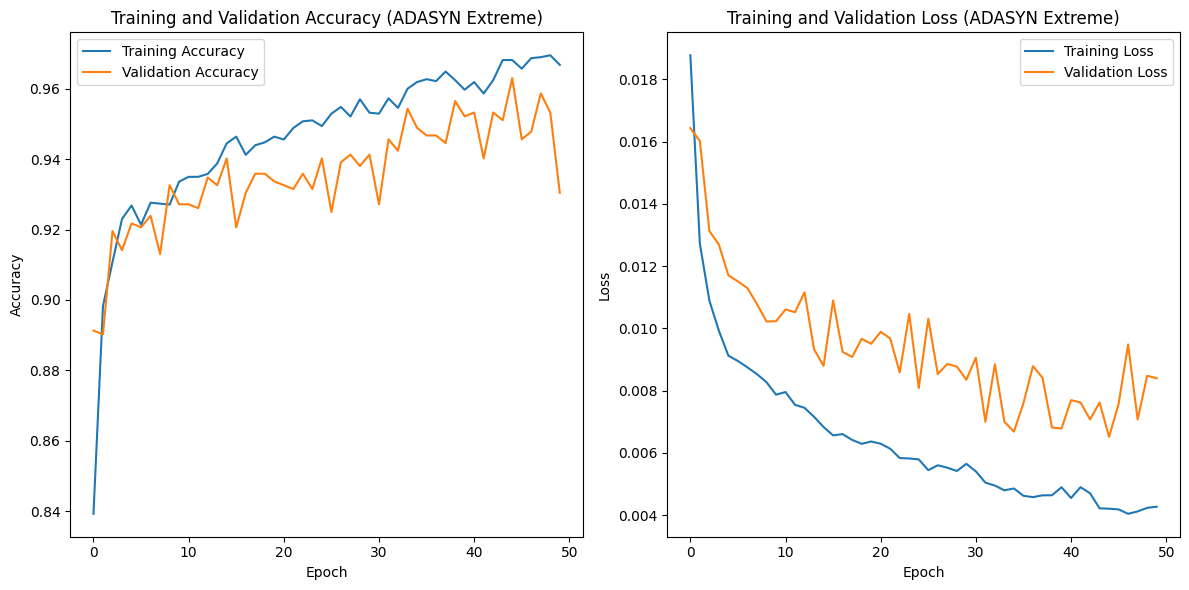

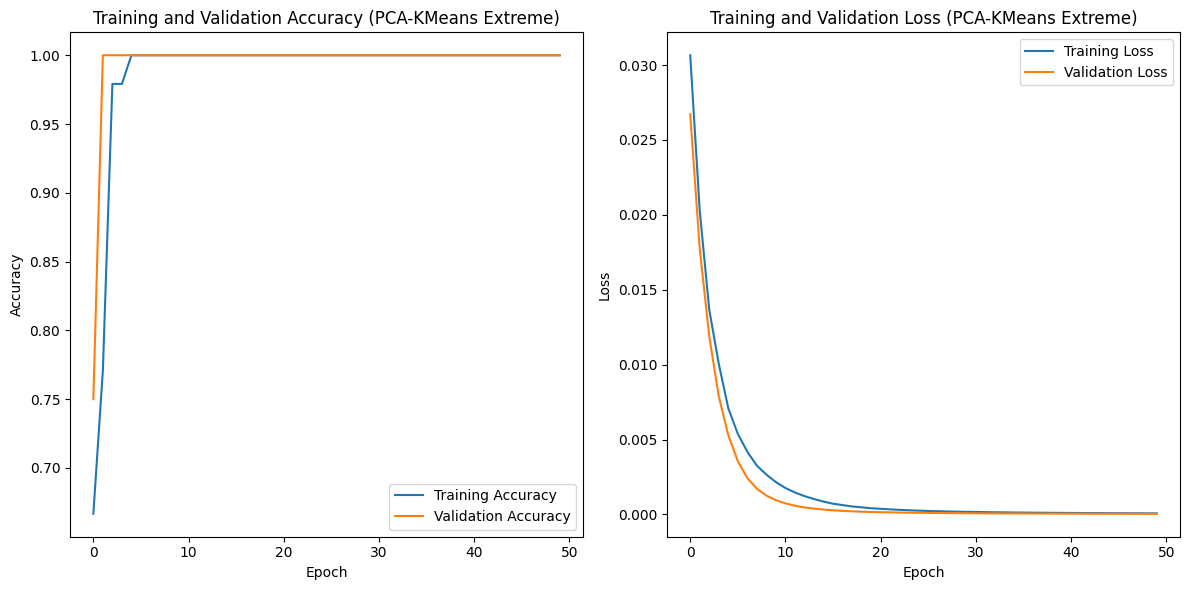

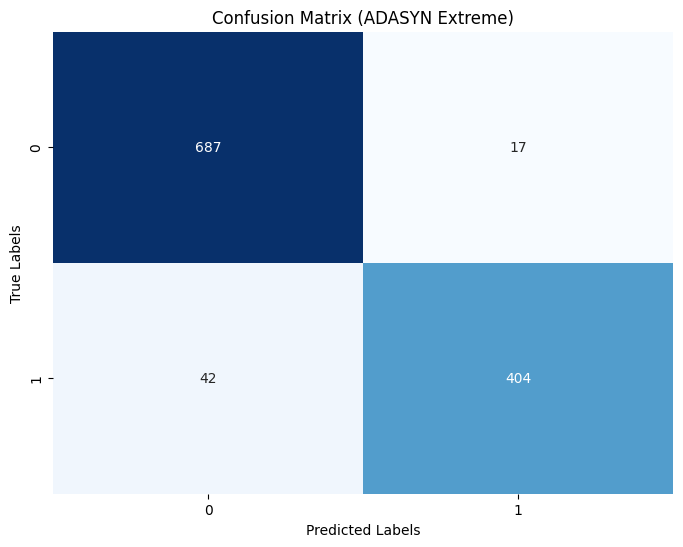

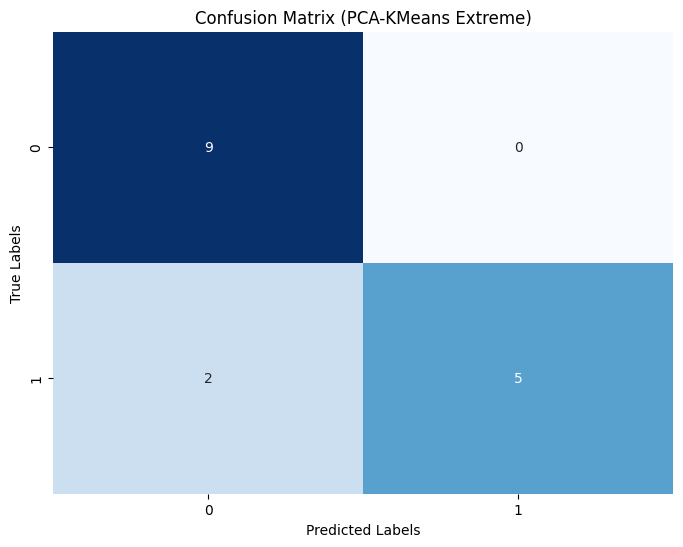

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay
# Visualisasi Akurasi dan Loss untuk Adasyn Mild
plt.figure(figsize=(12, 6))

# Plot Akurasi
plt.subplot(1, 2, 1)
plt.plot(history_adasyn.history['accuracy'], label='Training Accuracy')
plt.plot(history_adasyn.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy (ADASYN Extreme)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history_adasyn.history['loss'], label='Training Loss')
plt.plot(history_adasyn.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss (ADASYN Extreme)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Visualisasi Akurasi dan Loss untuk PCA-KMeans Mild
plt.figure(figsize=(12, 6))

# Plot Akurasi
plt.subplot(1, 2, 1)
plt.plot(history_pca_kmeans.history['accuracy'], label='Training Accuracy')
plt.plot(history_pca_kmeans.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy (PCA-KMeans Extreme)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history_pca_kmeans.history['loss'], label='Training Loss')
plt.plot(history_pca_kmeans.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss (PCA-KMeans Extreme)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


# Visualisasi Confusion Matrix untuk ADASYN Mild
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_adasyn, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix (ADASYN Extreme)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Visualisasi Confusion Matrix untuk PCA-KMeans Mild
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_pca_kmeans, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix (PCA-KMeans Extreme)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()
